In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import seaborn as sns
from skimage.morphology import closing, square, opening

In [2]:
path = "/Users/german/Documents/MASTER/Courses/M6 - Video Analysis/Project/W1/results"
img45_name = "LKflow_000045_10.png"
img157_name = "LKflow_000157_10.png"
GT_img45_name = "000045_10.png"
GT_img157_name = "000157_10.png"
RGB_img45_name = "color/000045_10.png"
RGB_img157_name = "color/000157_10.png"

In [3]:
img45 = cv2.cvtColor(cv2.imread(os.path.join(path, img45_name), cv2.IMREAD_UNCHANGED).astype(np.uint16), cv2.COLOR_BGR2RGB)
img157 = cv2.cvtColor(cv2.imread(os.path.join(path, img157_name), cv2.IMREAD_UNCHANGED).astype(np.uint16), cv2.COLOR_BGR2RGB)
img45_GT = cv2.cvtColor(cv2.imread(os.path.join(path, GT_img45_name), cv2.IMREAD_UNCHANGED).astype(np.uint16), cv2.COLOR_BGR2RGB)
img157_GT = cv2.cvtColor(cv2.imread(os.path.join(path, GT_img157_name), cv2.IMREAD_UNCHANGED).astype(np.uint16), cv2.COLOR_BGR2RGB)
img45_RGB = cv2.cvtColor(cv2.imread(os.path.join(path, RGB_img45_name), cv2.IMREAD_UNCHANGED).astype(np.uint16), cv2.COLOR_BGR2RGB)
img157_RGB = cv2.cvtColor(cv2.imread(os.path.join(path, RGB_img157_name), cv2.IMREAD_UNCHANGED).astype(np.uint16), cv2.COLOR_BGR2RGB)

> IMG 45 <

MSEN = 10.627 - PEPN = 78.560%


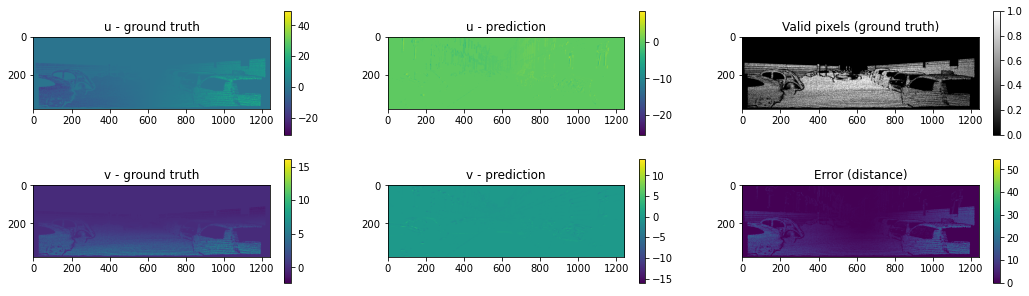

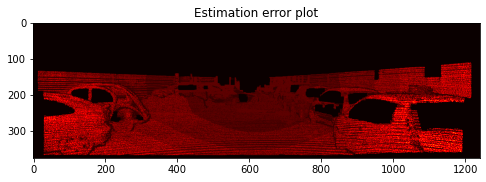

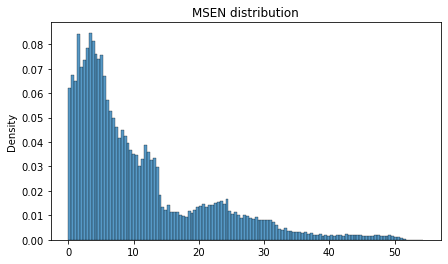

In [7]:
def transform_annotation(img):
    flow_u = (img[:,:,0].astype(float) - 2. ** 15) / 64.0
    flow_v = (img[:,:,1].astype(float) - 2. ** 15) / 64.0
    valid  = img[:,:,2].astype(bool)
    return flow_u, flow_v, valid

def run_task3(img, gt_img, th=3):
    assert (gt_img.shape == img.shape)
    
    # we transform the annotations as explained in the documentation
    GT_u, GT_v, GT_valid = transform_annotation(gt_img)
    u, v, _ = transform_annotation(img)

    # we compute the motion vectors between GT and inferred
    motion_vectors = np.square(GT_u - u) + np.square(GT_v - v)
    motion_vectors_dist = np.sqrt(motion_vectors)

    # we compute metrics considering only non-occluded pixels (GT_valid)
    msen = np.mean(np.sqrt(motion_vectors)[GT_valid != 0])
    pepn = 100 * (motion_vectors_dist[GT_valid != 0] > th).sum() / (GT_valid != 0).sum()  # erroneous / total
    
    print(f"\nMSEN = {msen:.3f} - PEPN = {pepn:.3f}%")
    
    cmap = "viridis"
    fig, ax = plt.subplots(2,3, figsize=(18,5))
    ax[0][0].set_title("u - ground truth")
    im = ax[0][0].imshow(GT_u, cmap=cmap)
    plt.colorbar(im, ax=ax[0,0])
    
    ax[1][0].set_title("v - ground truth")
    im = ax[1][0].imshow(GT_v, cmap=cmap)
    plt.colorbar(im, ax=ax[1,0])
    
    ax[0][2].set_title("Valid pixels (ground truth)")
    im = ax[0][2].imshow(GT_valid, cmap='gray')
    plt.colorbar(im, ax=ax[0,2])
    
    ax[0][1].set_title("u - prediction")
    im = ax[0][1].imshow(u, cmap=cmap)
    plt.colorbar(im, ax=ax[0,1])
    
    ax[1][1].set_title("v - prediction")
    im = ax[1][1].imshow(v, cmap=cmap)
    plt.colorbar(im, ax=ax[1,1])
    
    rge = motion_vectors_dist.max() - motion_vectors_dist.min()
    ax[1][2].set_title("Error (distance)")
    im = ax[1][2].imshow(motion_vectors_dist, cmap=cmap)
    plt.colorbar(im, ax=ax[1,2])
    plt.show()
    
    plt.figure(figsize=(8,6))
    plt.title("Estimation error plot")
    rge = motion_vectors_dist.max() - motion_vectors_dist.min()
    img = np.ceil(1 + 15 * (motion_vectors_dist - np.min(motion_vectors_dist)) / rge)
    img[opening(GT_valid == 0, square(10))] = 0
    plt.imshow(img, cmap='hot')
    
    plt.figure(figsize=(7,4))
    plt.title("MSEN distribution")
    sns.histplot(motion_vectors_dist[GT_valid != 0], stat="density")
    plt.plot()
    
    
print("> IMG 45 <")
run_task3(img45, img45_GT)

> IMG 157 <

MSEN = 2.75 - PEPN = 34.05%


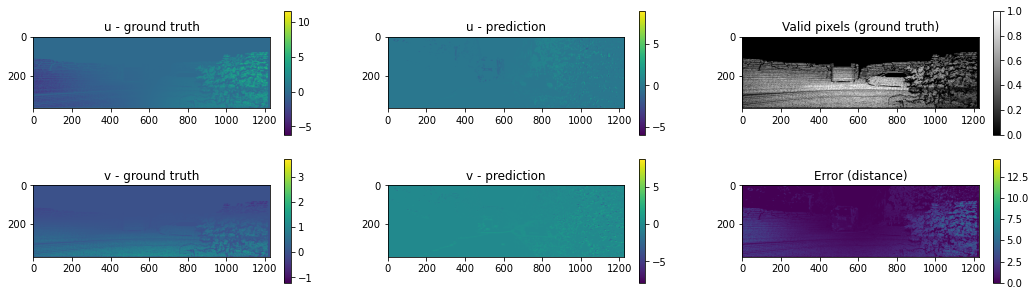

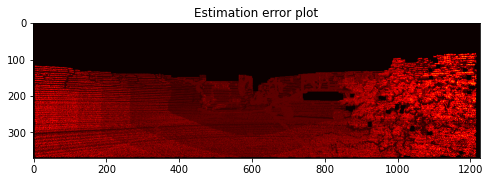

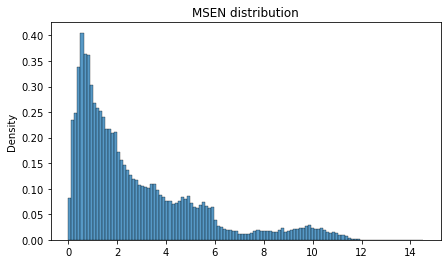

In [6]:

print("> IMG 157 <")
run_task3(img157, img157_GT)

# Task 4

(370, 1226, 3)


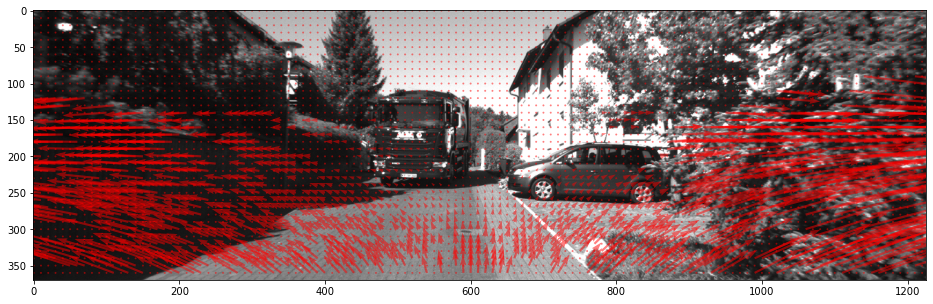

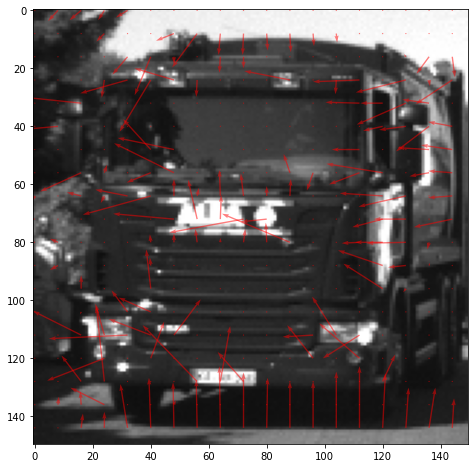

In [12]:
def run_task4(of_img, grayscale_img, step=30):
    GT_u, GT_v, GT_valid = transform_annotation(of_img)
    flow = np.stack([GT_u, GT_v], -1)
    flow[GT_valid == 0][:] = 0
    
    plt.figure(figsize=(16,8))
    plt.imshow(grayscale_img)
    plt.quiver(np.arange(0, flow.shape[1], step), np.arange(0, flow.shape[0], step), 
               flow[::step, ::step, 0], flow[::step, ::step, 1], color='red',
               alpha=0.5)

    plt.show()
    
    
def run_task4_bis(of_img, grayscale_img, step=30):
    GT_u, GT_v, GT_valid = transform_annotation(of_img)
    flow = np.stack([GT_u, GT_v], -1)
    flow[GT_valid == 0][:] = 0
    
    plt.figure(figsize=(16,8))
    plt.imshow(grayscale_img)
    plt.quiver(np.arange(0, flow.shape[1], step), np.arange(0, flow.shape[0], step), 
               flow[::step, ::step, 0], flow[::step, ::step, 1], color='red',
               alpha=0.5)

    plt.show()
    
print(img157.shape)
run_task4(img157_GT, img157_RGB, step=10)
run_task4(img157[100:250, 450:600,:], img157_RGB[100:250,450:600], step=8)